In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df=pd.read_csv("Maharashtra.csv")


In [37]:
Days=np.array(df['days'])
print("Days",Days)
Confirmed=np.array(df['confirmed'])
print("Confirmed",Confirmed)
Deaths=np.array(df['deceased'])
print("Deaths",Deaths)
Recovered=np.array(df['recovered'])
print("Recoverd",Recovered)

Days [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
Confirmed [  14   18    6    3    3    4    4   12   10   23   10   15    3   31
   30   17   17   82   33   88   64  148  112  121  150  117  229  210
  187  221  352  346  236  285  120  327  552  466  552  431  778  390
  811  440  522  728  597  583 1008  790  678 1567  984 1233 1216 1089
 1165 1943 1230 1026 1495 1602 1576 1606 2347 2005 2078 2161 2345 2940
 2608 3041 2436 2091 2190 2598 2682 2940 2487 2358 2287 2560 2933 2436
 2739 3007 2554 2258 3254 3607 3493 3427 3390 2786 2701 3307 3752 3827
 3874 3870 3721 3214 3889 4842]
Deaths [   0    0    0    1    0 

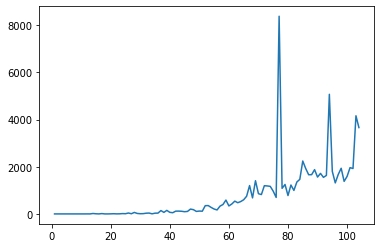

In [38]:
plt.plot(Days,Recovered)

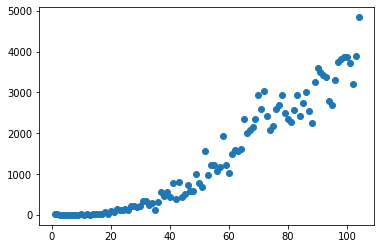

In [39]:
plt.scatter(Days,Confirmed)

In [40]:
random_indices=(np.random.permutation(104))
print(random_indices)
Days_train=Days[random_indices[:]]
print(Days_train)
Confirmed_train=Confirmed[random_indices[:]]
print(Confirmed_train)
Recovered_train=Recovered[random_indices[:]]
Recovered_test=Recovered[random_indices[80:]]
print(Recovered_train)
Deaths_train=Deaths[random_indices[:]]
print(Deaths_train)



[ 37   0  85  88  92  67  73  26  50  44  48  52  61   6  13  14  35  17
  98  16  22  56  87  38  69  15  86  30  55   4  62  81  46   9  21  20
   7  78  80  25  42  93  79  94   8  31  63   5  45  36 103   3  54  71
  70  39  64  66  91  83   2  84  89  72  53  40  28  10  32  24  33  96
  75   1  74 101  97  82  41  68  60 100  12  49  27  77 102  95  76  34
  99  59  65  57  29  11  19  58  23  43  18  51  90  47]
[ 38   1  86  89  93  68  74  27  51  45  49  53  62   7  14  15  36  18
  99  17  23  57  88  39  70  16  87  31  56   5  63  82  47  10  22  21
   8  79  81  26  43  94  80  95   9  32  64   6  46  37 104   4  55  72
  71  40  65  67  92  84   3  85  90  73  54  41  29  11  33  25  34  97
  76   2  75 102  98  83  42  69  61 101  13  50  28  78 103  96  77  35
 100  60  66  58  30  12  20  59  24  44  19  52  91  48]
[ 466   14 3007 3254 3390 2161 2091  229  678  522 1008  984 1602    4
   31   30  327   82 3874   17  112 1165 2258  552 2940   17 2554  352
 1089    3 1

In [41]:
print(len(Confirmed_train))
print(len(Recovered_train))

104
104


In [42]:
#Linear Regression
def model_train(x_train,y_train):
  model=LinearRegression()#Instace for Linear Model
  #sklearn takes input as matrix so we have to reshape the matrix into column matrix
  x_train_for_fitting=np.matrix(x_train.reshape(len(x_train),1))
  y_train_for_fitting=np.matrix(y_train.reshape(len(y_train),1))
  
  #fit the data into the model
  return(model.fit(x_train_for_fitting,y_train_for_fitting))

In [43]:
model=model_train(Days_train,Confirmed_train)
model_prediction=model.predict(Days.reshape(len(Days),1))
print(Days_train)
print(Confirmed_train)

[ 38   1  86  89  93  68  74  27  51  45  49  53  62   7  14  15  36  18
  99  17  23  57  88  39  70  16  87  31  56   5  63  82  47  10  22  21
   8  79  81  26  43  94  80  95   9  32  64   6  46  37 104   4  55  72
  71  40  65  67  92  84   3  85  90  73  54  41  29  11  33  25  34  97
  76   2  75 102  98  83  42  69  61 101  13  50  28  78 103  96  77  35
 100  60  66  58  30  12  20  59  24  44  19  52  91  48]
[ 466   14 3007 3254 3390 2161 2091  229  678  522 1008  984 1602    4
   31   30  327   82 3874   17  112 1165 2258  552 2940   17 2554  352
 1089    3 1576 2560  597   23  148   64   12 2487 2287  117  811 2786
 2358 2701   10  346 1606    4  728  552 4842    3 1216 3041 2608  431
 2347 2078 3427 2436    6 2739 3607 2436 1233  778  187   10  236  150
  285 3752 2598   18 2190 3214 3827 2933  390 2345 1495 3721    3  790
  210 2940 3889 3307 2682  120 3870 1026 2005 1943  221   15   88 1230
  121  440   33 1567 3493  583]


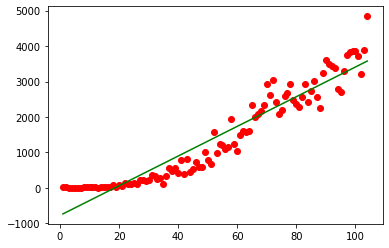

In [44]:
plt.scatter(Days_train,Confirmed_train,color="red")
plt.plot(Days.reshape(len(Days),1),model_prediction,color="green")

In [45]:
def poly_regr(X_train,Y_train,degree):
  polynom=PolynomialFeatures(degree=degree)
  X_poly=polynom.fit_transform(X_train.reshape(len(X_train),1))
  polyReg=LinearRegression()
  return polyReg.fit(X_poly,Y_train.reshape(len(Y_train),1))

In [46]:
polynom=PolynomialFeatures(degree=4)
model=poly_regr(Days_train,Confirmed_train,4)

In [47]:
print(model)

predict=model.predict(polynom.fit_transform(Days_train.reshape(len(Days_train),1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [55]:
#Creating Array Of Custom Days
Days_array=[]
for i in range(100,140):
  Days_array.append(i)
Days_predict=np.array(Days_array)
#Prdict the model on future date
predict_confirm=model.predict(polynom.fit_transform(Days_predict.reshape(len(Days_predict),1)))

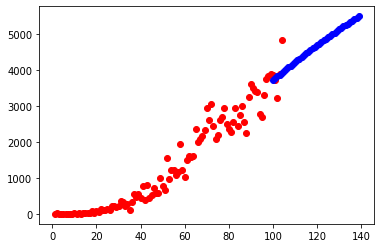

In [56]:
plt.scatter(Days_train,Confirmed_train,color="red")
plt.scatter(Days_predict,predict_confirm,color="blue")